In [6]:
%load_ext autoreload

import sys
sys.path.insert(0, '..')

import torch
from torch import nn
from external.QuaterNet.common import quaternion
import numpy as np
import math
import matplotlib.pyplot as plt

from models import super_shape
from models import super_shape_sampler
from models import periodic_shape_sampler
from models import periodic_shape_sampler_xyz
import utils
from visualize import plot


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


tensor([2.3842e-07, 2.3842e-07, 1.7881e-07, 1.7881e-07, 1.1921e-07, 1.7881e-07,
        1.7881e-07, 1.1921e-07, 2.3842e-07])
tensor([False, False, False, False, False, False, False, False, False])
tensor([])


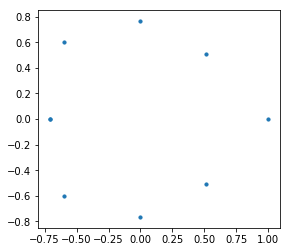

In [11]:
batch = 1
m = 3
n = 1
n1 = 1
n2 = 1
n3 = 1
a = 1
b = 1
P = 50
dim = 2
sample_num = 9

rotations = [[0.]]
transitions = [[0., 0.]]
linear_scales = [[1., 1.]] * n

preset_params = utils.generate_multiple_primitive_params(
    m,
    n1,
    n2,
    n3,
    a,
    b,
    rotations_angle=rotations,
    transitions=transitions,
    linear_scales=linear_scales,
    nn=n)

thetas = utils.sample_spherical_angles(
    sample_num=sample_num, batch=batch, dim=dim)
sampler = super_shape_sampler.SuperShapeSampler(m, n, dim=dim)
# B, N, P
radius = sampler.transform_circumference_angle_to_super_shape_radius(
    thetas, preset_params)
# B, P, dim
coord = sampler.transform_circumference_angle_to_super_shape_world_cartesian_coord(
    thetas, radius, preset_params).view(batch, -1, dim)

sgn = sampler.transform_world_cartesian_coord_to_tsd(
    coord, preset_params)

fig = plt.figure()
g = fig.add_subplot(1, 1, 1)
plot.plot_primitive_point_cloud_2d(g, coord, s=10)

x = coord[0, :, 0].detach().cpu().numpy()
y = coord[0, :, 1].detach().cpu().numpy()
sgn = sgn.view(-1)
print(sgn)

error_idx =  ~((-1e-5 < sgn) & (sgn < 1e-5))
print(error_idx)
g.scatter(x[error_idx], y[error_idx])
error_thetas = thetas.view(-1)[error_idx]
print(error_thetas/math.pi * 180.)

#assert torch.allclose(sgn, torch.zeros_like(sgn),
#                                  atol=1e-5), (sgn.min(), sgn.max())

In [12]:


"""
surafce_points_list = [surface_points1]
fig = plt.figure()
for idx, surface_points in enumerate(surafce_points_list):
    g = fig.add_subplot(1, len(surafce_points_list), idx+1)
    plot.plot_primitive_point_cloud_2d(g, surface_points)

tsd_list = [tsd1]
fig = plt.figure()
for idx, tsd in enumerate(tsd_list):
    g = fig.add_subplot(1, len(tsd_list), idx+1)
    plot.draw_primitive_inside_2d(g, tsd, coord)
"""


'\nsurafce_points_list = [surface_points1]\nfig = plt.figure()\nfor idx, surface_points in enumerate(surafce_points_list):\n    g = fig.add_subplot(1, len(surafce_points_list), idx+1)\n    plot.plot_primitive_point_cloud_2d(g, surface_points)\n\ntsd_list = [tsd1]\nfig = plt.figure()\nfor idx, tsd in enumerate(tsd_list):\n    g = fig.add_subplot(1, len(tsd_list), idx+1)\n    plot.draw_primitive_inside_2d(g, tsd, coord)\n'